In [3]:
# Clustering con Python
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../datasets/wine/winequality-red.csv', sep=';')
df.shape

(1599, 12)

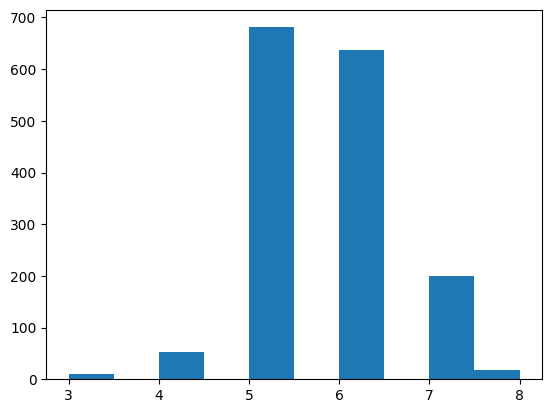

In [5]:
plt.hist(df['quality'])
plt.show()

In [6]:
# Caracteristicas de los vinos agrupados por calidad 
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [7]:
df.groupby('quality').std()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,1.770875,0.331256,0.250664,1.401596,0.066241,9.763879,16.828877,0.002002,0.144052,0.122020,0.818009
4,1.626624,0.220110,0.201030,1.789436,0.076192,9.025926,27.583374,0.001575,0.181441,0.239391,0.934776
5,1.563988,0.164801,0.180003,1.359753,0.053707,10.955446,36.993116,0.001589,0.150618,0.171062,0.736521
6,1.797849,0.160962,0.195108,1.441576,0.039563,9.940911,25.038250,0.002000,0.153995,0.158650,1.049639
7,1.992483,0.145224,0.194432,1.371509,0.029456,10.175255,33.191206,0.002176,0.150101,0.135639,0.961933
8,2.119656,0.144914,0.199526,1.295038,0.011678,11.155613,25.433240,0.002378,0.200640,0.115379,1.224011


In [9]:
# Normalizacion de los datos
# Min-Max Normalization
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [11]:
# Clustering jerarquico con scikit-learn
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(df_norm)

md = pd.Series(cluster.labels_)
md

0       2
1       2
2       2
3       3
4       2
       ..
1594    4
1595    4
1596    4
1597    4
1598    0
Length: 1599, dtype: int64

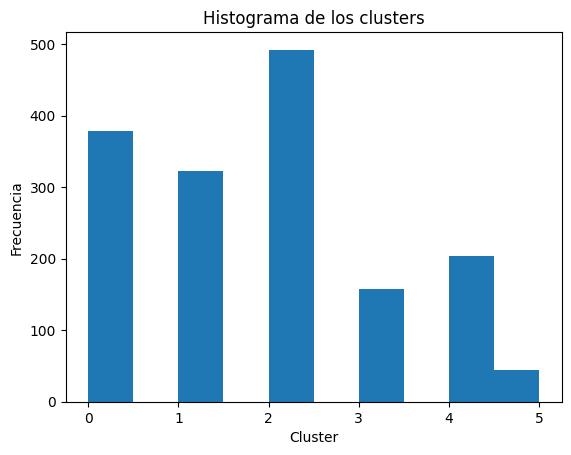

In [13]:
plt.hist(md)
plt.xlabel('Cluster')
plt.ylabel('Frecuencia')
plt.title('Histograma de los clusters')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'setxticks'

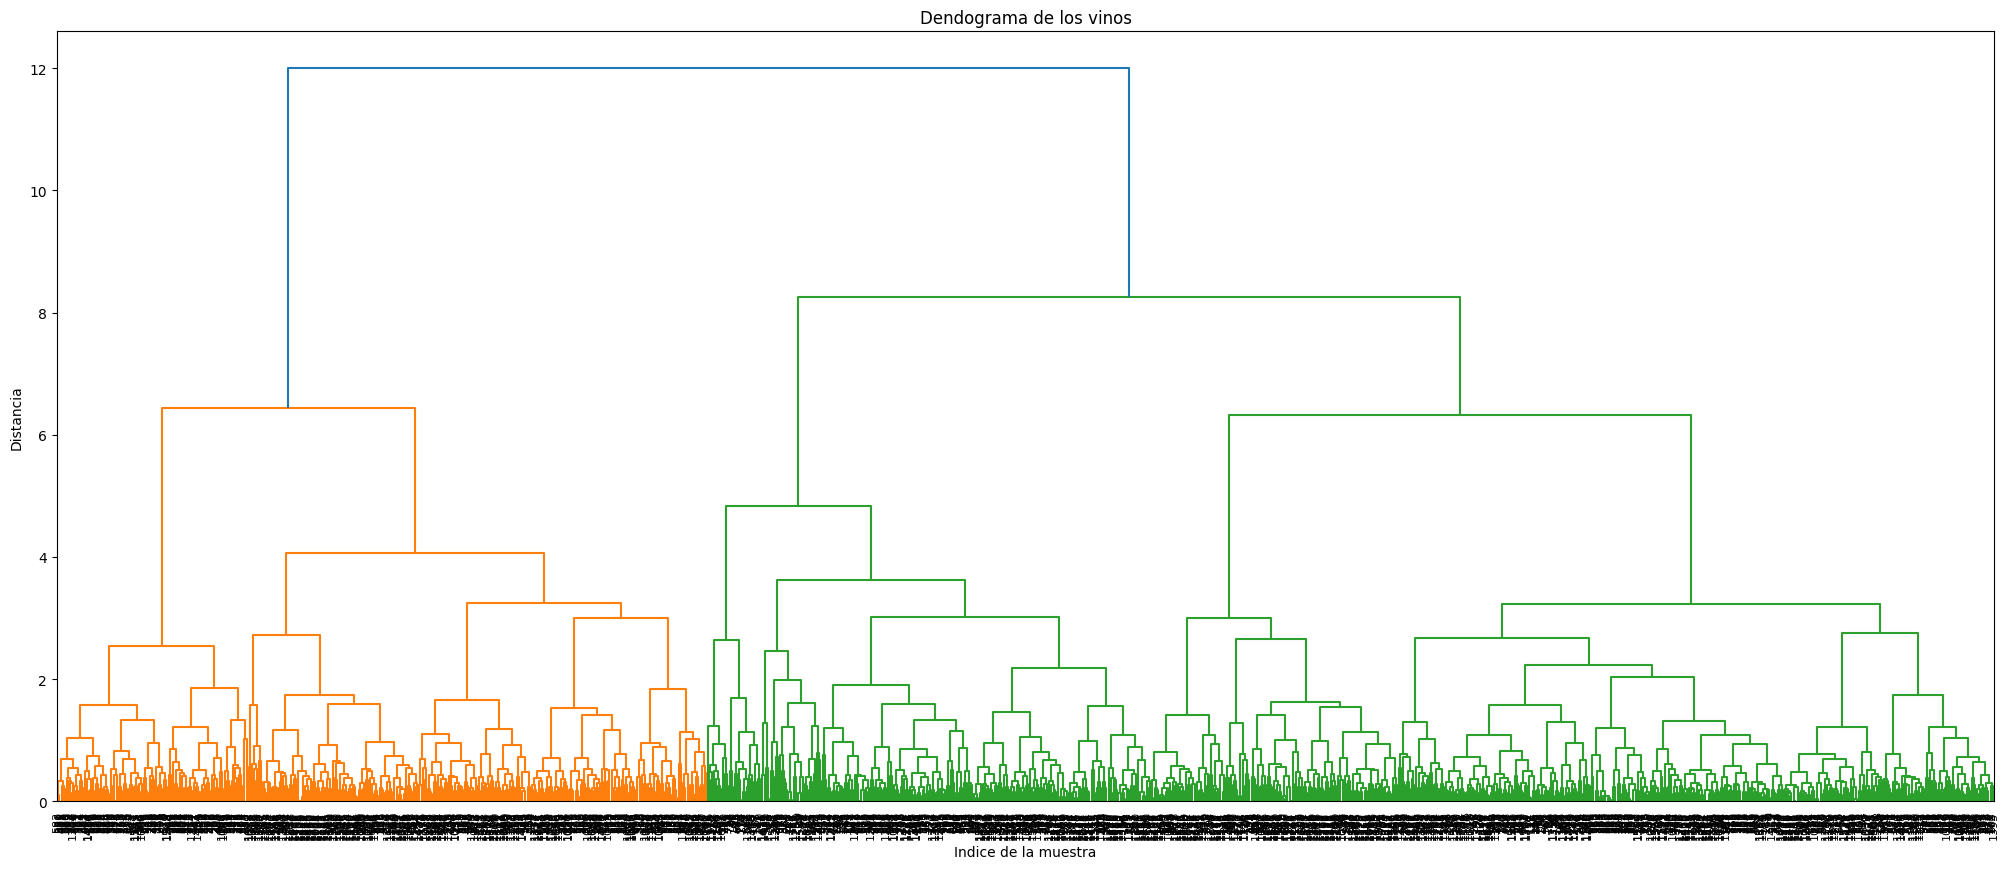

In [15]:
# Dendograma
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df_norm, 'ward')
plt.figure(figsize=(25, 10))
plt.title('Dendograma de los vinos')
plt.xlabel('Indice de la muestra')
plt.ylabel('Distancia')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

In [16]:
## K-Means con scikit-learn
from sklearn.cluster import KMeans


model = KMeans(n_clusters=6)
model.fit(df_norm)

# Centroides
model.cluster_centers_

c:\Users\Psyche\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[0.31889019, 0.28062807, 0.30289308, 0.15234341, 0.12722987,
        0.37664984, 0.29634198, 0.54131688, 0.43398703, 0.17830377,
        0.21135301, 0.45408805],
       [0.26297819, 0.35946095, 0.11773622, 0.09135341, 0.12259935,
        0.14543363, 0.10665396, 0.49028611, 0.48764648, 0.15515819,
        0.22155764, 0.44133858],
       [0.17304907, 0.32334994, 0.09159091, 0.09327522, 0.09518136,
        0.25496159, 0.12690331, 0.32130557, 0.58031496, 0.1860098 ,
        0.49296037, 0.61272727],
       [0.33628319, 0.28855502, 0.48129032, 0.07512152, 0.52835371,
        0.20445252, 0.20517497, 0.51563166, 0.24028448, 0.58489473,
        0.16476427, 0.46451613],
       [0.3612996 , 0.15926473, 0.4195053 , 0.10361102, 0.10682114,
        0.1624944 , 0.0852177 , 0.41785879, 0.42188587, 0.23636825,
        0.47431367, 0.68763251],
       [0.58829192, 0.20772912, 0.51619247, 0.13581131, 0.13039864,
        0.13778066, 0.09137011, 0.65990821, 0.32978618, 0.22062987,
        0.29331617,

In [17]:
model.labels_ # Etiquetas de los clusters

array([1, 1, 1, ..., 2, 2, 4])

In [18]:
md_k = pd.Series(model.labels_)

In [19]:
df_norm['clust_h'] = md
df_norm['clust_k'] = md_k

df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,1
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,5
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1


(array([318.,   0., 508.,   0., 220.,   0.,  31.,   0., 283., 239.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

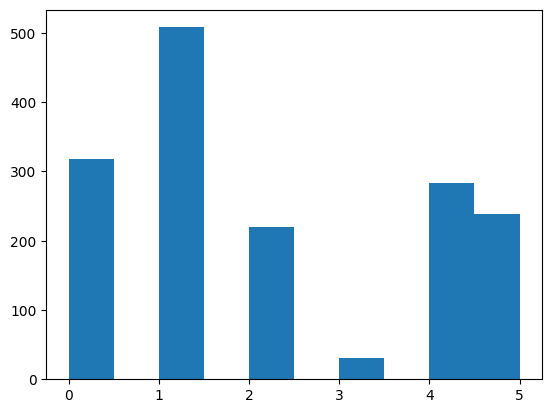

In [20]:
plt.hist(df_norm['clust_k'])

In [21]:
model.inertia_ # Suma de las distancias al cuadrado de los puntos a su centroide mas cercano

186.572273038846

In [23]:
# Interpretacion de los clusters
df_norm.groupby('clust_k').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.318890,0.280628,0.302893,0.152343,0.127230,0.376650,0.296342,0.541317,0.433987,0.178304,0.211353,0.454088,1.050314
1,0.262978,0.359461,0.117736,0.091353,0.122599,0.145434,0.106654,0.490286,0.487646,0.155158,0.221558,0.441339,2.029528
2,0.173049,0.323350,0.091591,0.093275,0.095181,0.254962,0.126903,0.321306,0.580315,0.186010,0.492960,0.612727,3.459091
3,0.336283,0.288555,0.481290,0.075122,0.528354,0.204453,0.205175,0.515632,0.240284,0.584895,0.164764,0.464516,4.903226
4,0.361300,0.159265,0.419505,0.103611,0.106821,0.162494,0.085218,0.417859,0.421886,0.236368,0.474314,0.687633,0.141343
5,0.588292,0.207729,0.516192,0.135811,0.130399,0.137781,0.091370,0.659908,0.329786,0.220630,0.293316,0.546444,2.083682



Para ajustar el parámetro $k$ de nuestro clustering, hay dos metodos interesantes, los cuales son:
- Método del codo
- Método de la silueta

Partiremos en orden y vamos a explicar primero, el método del codo

## Método del codo
El método del codo es una buena forma para medir la compactación del Cluster. Una forma de medir esto es usando la distancia intracluster, y medimos con la suma de los cuadrados internos con el varicentro.

Estas métricas midén la varianza dentro de un cluster. Incrementar el número de clusters, obviamente hará decrecer la suma de los cuadrados internos. Pero la técnica del codo, es una representación de la suma de los cuadrados internos, y siempre hay un punto donde hay una variación maxima y se estabiliza. 

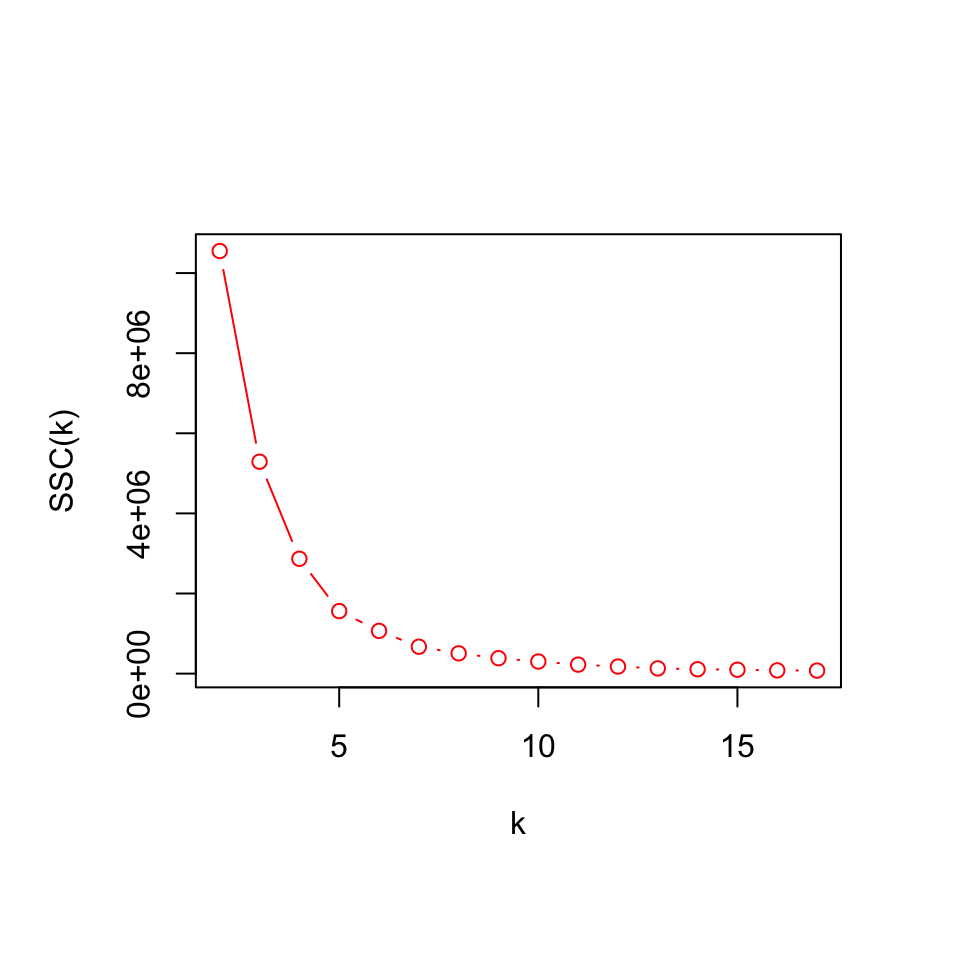

En el caso de la imagén en $k = 5$ es donde hay una variación. Y es donde esta el codo donde se encuentra el número optimo de clusters para dar como parámetro al K-MEANS.

## Coeficiente de la silueta
El coeficiente de siulueta cuantifica como de bien ese punto esta unido al resto de puntos del cluster, es decir que tan compacto estan los datos respecto al cluster mas cercano. El coeficiente de la silueta se otiene analizando la distantia intracluster y tambien la distancia de los puntos al cluster mas cercano, es decir.

- Dado cualquien dataset, definimos:
    - Como de bien el punto está unido a cada uno de los puntos de su cluster mas cercano. $a(i)$ = el promedio de distancia de cada punto $i$ a cada uno de los puntos del mismo cluster (cuanto menor sea el valor, mejor ha sido asignado el punto).
    - Como de bien está el punto separado de los puntos del cluster vecino mas cercano $b(i)$ = la menor distancia promedio de cada punto $i$ a cualquier otro cluster que no contenga a dicho punto. Esta es la alternativa de clasificación mas cercana a $i$ despues de la que actualmente tiene.

El coeficiente de la silueta se define como:
$$
S(i) = \frac{b(i)-a(i)}{max({a(i), b(i)})} , S(i) = \begin{cases} 1 - \frac{a(i)}{b(i)} &\text{ si } a(i) < b(i)\\0 &\text{ si } a(i) = b(i) \\ \frac{b(i)}{a(i)} - 1 &\text{ si } a(i) > b(i)\end{cases} \\ \text{donde:} -1 \leq S(i) \leq 1
$$

En este caso se define la silueta para cada punto i-esimo, como $b(i) - a(i)$ dividido por el máximo de los dos valores. 

La versión de la derecha es una versión alternativa para escribir la misma formula.

- Cuando S(i) tiene a 1 entonces $a(i) < b(i)$ y por lo tanto el punto ésta bien clasificado
- Cunado S(i) tiende a -1 entonces, el punto estaria mejor en su cluster vecino

El promedio de todos los puntos de los clusters nos informa si están bien agrupados o no. Mientras mas cercano a uno sea el promedio, mejor clasificados estan los puntos. 

El promedio de los coeficientes silueta de todos los puntos se puede usar para predecir el número optimo de clusters:

1. Empezamos con dos clusters
2. Calculamos el coeficiente prommedio del dataset
3. Si la silueta de algun cluster es muy inferior al promedio global, el numero de clusters es suboptimo y debemos elegir uno mas
4. Repetimos los pasos del 1 al 3 hasta alcancanzar su valor optimo segun el contexto o siluetas similares ($k=6$, por ejemplo)
5. Decidimos el candidato potencial segun los resultados obtenidos. 

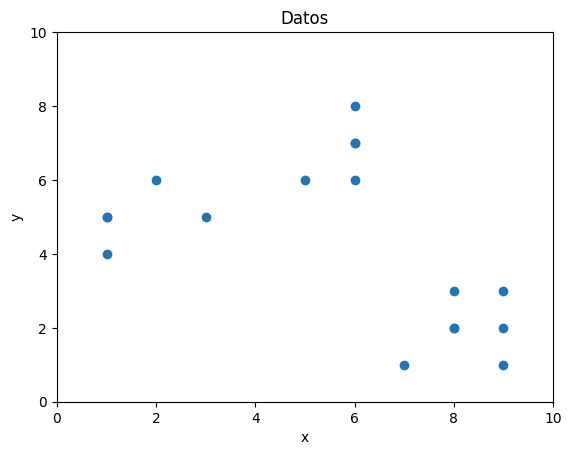

In [28]:
# Metodo del codo y Silhouette
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist

x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Datos')
plt.scatter(x1, x2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


c:\Users\Psyche\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Psyche\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Psyche\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Psyche\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Psyche\anac

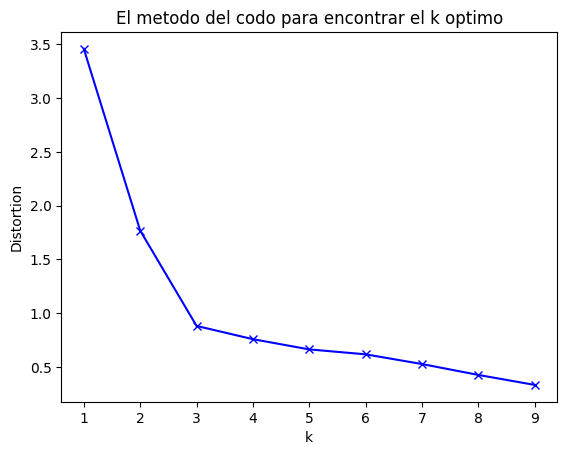

In [30]:
#   Metodo del codo
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('El metodo del codo para encontrar el k optimo')
plt.show()


In [31]:
# El codo esta en k = 3
kmeanModel = KMeans(n_clusters=3).fit(X)


c:\Users\Psyche\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Psyche\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

## Propagación de la afinidad

Un problema de KMeans, es que si o si necesitamos definir el valor para $k$, es decir, el número de clusters. Si no estamos seguros al valor a encontrar podemos usar el método del codo o la silueta para escoger el valor de $k$.

Paralelamente, en 2007 se propuso una tecnica llamada *propagación de la afinidad*. Esto se basa en crear clustering con una tecnica de *transferencia de mensajes*.

En este caso, los clusters se cálculan a través de los puntos del dataset.

Paso de mensajes:

$$
\begin{align}
r(i, k) &= s(i, j) - max_{j \neq k}(a(i, j) + s(i, j) \\
s(i, k) &= \frac{1}{d(i, k)} \\
a(i, k) &= min(0, r(k, k) + \sum\limits_{j \in {i, k}}{max(0, r(j, k))}) \\
a(k, k) &= \sum\limits_{j \neq k}{max(0, r(j, k))}
\end{align}
$$

(2). Se toma una matriz de similaridades como entrada que se suele llamar $s$, y son las inversas de las distancias euclideas. De modo que puntos que son muy cercanos en distancias suelen tener una similaridad muy elevada.
(1). $r(i, k)$ Es la matriz de responsabilidad, y se inicializa en cero. Una responsabilidad elevada ocurre cuando un punto $k$ es muy similar a un punto $i$ en el dataset.

(3). $a(i, k)$ Es la matriz de disponibilidad, y se inicializa en cero. La disponibilidad representa que tan buen candidato es un punto para ser el centro del cluster para i, y juzga si puede o no ser el centro para otros puntos tambien.

(4). Si $i = k$ entonces la disponibilidad de k con respecto a k, es el máximo entre 0 y la responsabilidad entre j y k.

Estos pasos se describen como **paso de mensaje**, porque se representa como un intercambio de información entre dos puntos de datos, respecto a su probabilidad relativa de pertenecer a un mismo cluster. 

Mientras el algoritmo procede, se minimiza la responsabilidad, hasta llegar a valores negativos. Una vez que no hay tanta variabilidad entre responsabilidades y disponibilidades no cambian mucho, cada punto estara asignado respecto a un centro, significando que los puntos del cluster automaticamente habran sido determinados a partir del dataset original.

El número de clusters se calcula automaticamente.

Este algoritmo no es muy escalable, debido a que de partida la implementación mas minima para comenzar, necesita partir de una matriz NxN y si tenemos mas valores podria pasar que fuera una tecnica muy pesada. 

Tambien podria que detecte mas clusters que el método del codo. Si bien es automatico, sin supervisar ni interpretar el resultado podria ser peligroso de usar.

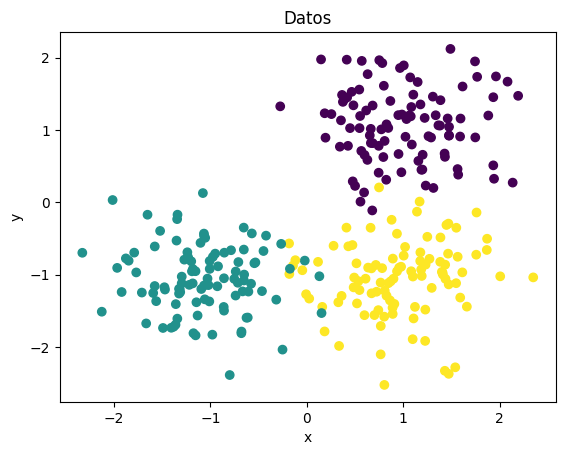

In [45]:
# Propagacion de la afinidad
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs
from itertools import cycle

centers = [[1, 1], [-1, -1], [1, -1]]

# Generamos los dattos de juguete
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c = labels_true)
plt.title('Datos')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [46]:
# Calculamos la propagacion de la afinidad
af = AffinityPropagation(preference=-50).fit(X)
cluster_center_idx = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_center_idx)
print('Numero estimado de clusters: %d' % n_clusters_)

Numero estimado de clusters: 3


In [49]:
def report_affinity_propagation(X):
    af = AffinityPropagation(preference=-50).fit(X)
    cluster_centers_indices = af.cluster_centers_indices_
    labels = af.labels_
    n_clusters_ = len(cluster_centers_indices)
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
    print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
    print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels, metric='sqeuclidean'))
    print()

    plt.clf()
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X[cluster_centers_indices[k]]
        plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
        plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
        for x in X[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753



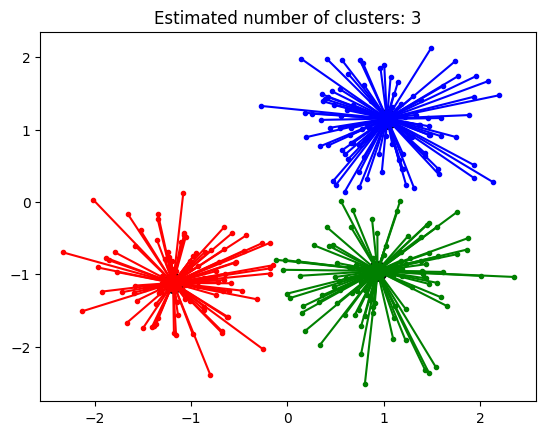

In [50]:
report_affinity_propagation(X)

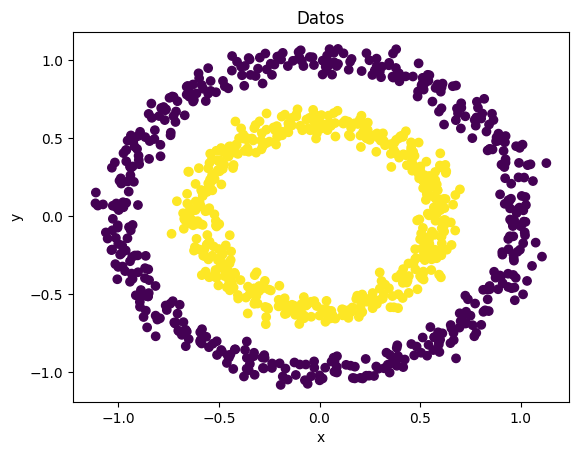

In [51]:
# Distribución en forma de anillos concéntricos
# Kmeans no funciona bien con este tipo de datos 
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=.6, noise=.05, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.title('Datos')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

c:\Users\Psyche\anaconda3\envs\ds\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


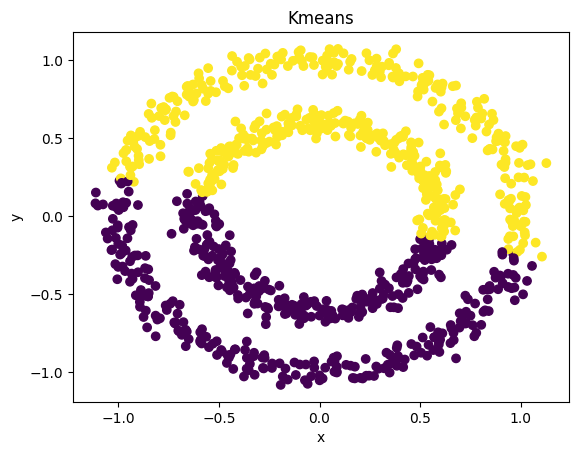

In [53]:
# Kmeans
kmeanModel = KMeans(n_clusters=2).fit(X)
labels = kmeanModel.labels_

plt.scatter(X[:, 0], X[:, 1], c = labels)
plt.title('Kmeans')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


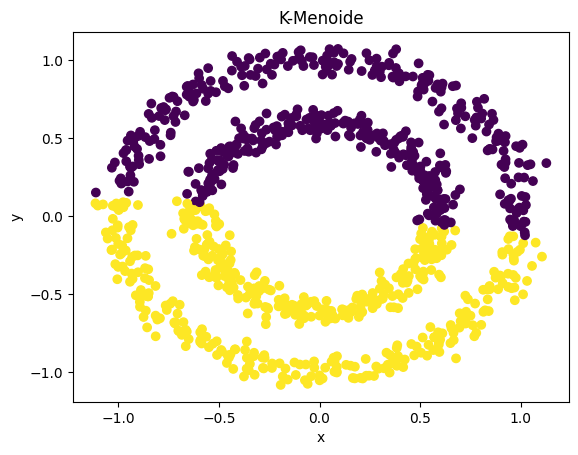

In [59]:
# La distancia que usa Kmeans es la euclidiana
# Por lo tanto no funciona bien con datos no linealmente separables
# Debido a que no se puede separar con una linea recta
# Por que la forma de los datos no es convexa
# En cambio la tecnica de K-Menoide si funciona
# K-Menoide es una variante de Kmeans que usa la medición de compatibilidad
# En lugar de la distancia euclidiana
from pyclust import KMedoids

clust = KMedoids(n_clusters=2, random_state=0).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c = clust)
plt.title('K-Menoide')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# No hay mejora porque elegir el que esta mas en medio no es la mejor opcion, debido a que hau mas puntos cercanos a la otra clase
# En vez de buscar similitudes habria que hacer una transformación lineal.
# O ocupar un tipo de clustering que no sea tan consciente de la distancia.
# Para esto se suele buscar los eigenvalores y eigenvectores de la matriz de covarianza
# Para hacer una transformación lineal que maximice la separación entre clases
# Pero tambien se puede buscar vecinos cercanos y hacer una transformación lineal que maximice la separación entre clases
# Para eso tenemos el clustering espectral
# que lo que hace es buscar los eigenvalores y eigenvectores de la matriz de adyacencia
# La matriz de adyacencia es una matriz que tiene 1 en la posicion (i,j) si el punto i es vecino del punto j
# Y 0 en caso contrario.

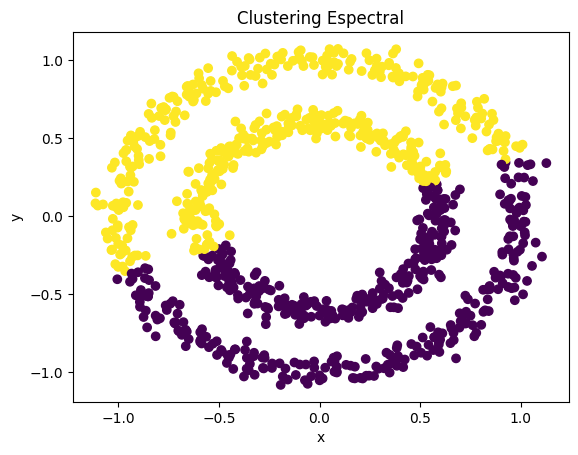

In [68]:
from sklearn.cluster import SpectralClustering

clusters = SpectralClustering(2).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c = clusters)
plt.title('Clustering Espectral')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

* Podemos estimar la k
    * No: Propagación de afinidad
    * Si: Podemos usar distancia euclidea:
        * Si: K-means
        * No: Buscar valores centrales:
            * Si: K-Menoides
            * No: ¿Los datos son linealmente separables?:
                * Si: Clustering Aglomerativo
                * No: Clustering Espectral